In [192]:
import pandas as pd

In [193]:
car=pd.read_excel('Quikr_Car.xlsx')

In [194]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     892 non-null    object
 1   name        892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  843 non-null    object
 5   fuel_type   839 non-null    object
 6   Unnamed: 6  1 non-null      object
dtypes: object(7)
memory usage: 48.9+ KB


In [195]:
backup=car.copy()  #backup copy

In [196]:
car=car[car['year'].astype(str).str.isnumeric()]#only numeric data are saved in car

In [197]:
car_year=car['year'].astype(int)
car['year']=car_year #str to int converted

In [198]:
car=car[car['Price']!='Ask For Price'] #Removed 'Ask For Price' from Price Column

In [199]:
#car['Price'].str.replace(',','').astype(int) 
#if ypu want to remove ',' from Price

In [200]:
car=car[car['Price']!=' for sale'] #Remove 'for sale' from Column
car['Price']=car['Price'].astype(int) #Converted into integer

In [201]:
car=car[car['kms_driven']!='Petrol'] #Reomved 'Petrol' from kms_driven columns
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','') #Removed 'Kms' & ',' from column

In [202]:
car=car[car['kms_driven'].str.isnumeric()] #only numeric data are saved
car['kms_driven']=car['kms_driven'].astype(int) #converted into integer

In [203]:
#car['fuel_type'].isna() #it will show boolean value 'True or False'
car=car[~car['fuel_type'].isna()] #Excluding this row i needed all rows

In [204]:
#car['name'].str.split(' ')  double space
#car['name'].str.split(' ').str.slice(0,3)#first 3 words
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')#joined by space 

In [205]:
car=car.reset_index(drop=True) #to reset index

In [206]:
unnamed_cols  =  car.columns.str.contains('Unnamed') #removed Unnamed Columns
car = car.drop(car[car.columns[unnamed_cols]], axis=1)
car

,company,name,year,Price,kms_driven,fuel_type
0,Hyundai,Hyundai Santro Xing,2007,80000,45000,Petrol
1,Mahindra,Mahindra Jeep CL550,2006,425000,40,Diesel
2,Hyundai,Hyundai Grand i10,2014,325000,28000,Petrol
3,Ford,Ford EcoSport Titanium,2014,575000,36000,Diesel
4,Ford,Ford Figo,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti,Maruti Suzuki Ritz,2011,270000,50000,Petrol
812,Tata,Tata Indica V2,2009,110000,30000,Diesel
813,Toyota,Toyota Corolla Altis,2009,300000,132000,Petrol
814,Tata,Tata Zest XM,2018,260000,27000,Diesel


In [207]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [208]:
car=car[car['Price']<6e6].reset_index(drop=True) #Here the 75 percent cards are 5lakhs lower and remaning cards shows extra 5Lakhs
#my maximium values are 85 lakhs which is wrong because every cards shows less digits
#6e6 means 60 Lakhs #we are removing all above sixity lakhs cars.
#this are outliers

In [209]:
car.to_csv('cleaned_used_car.csv') #saved cleaned data

In [211]:
import  matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')

In [212]:
#checking Relationship of Company with price 
import seaborn as sns

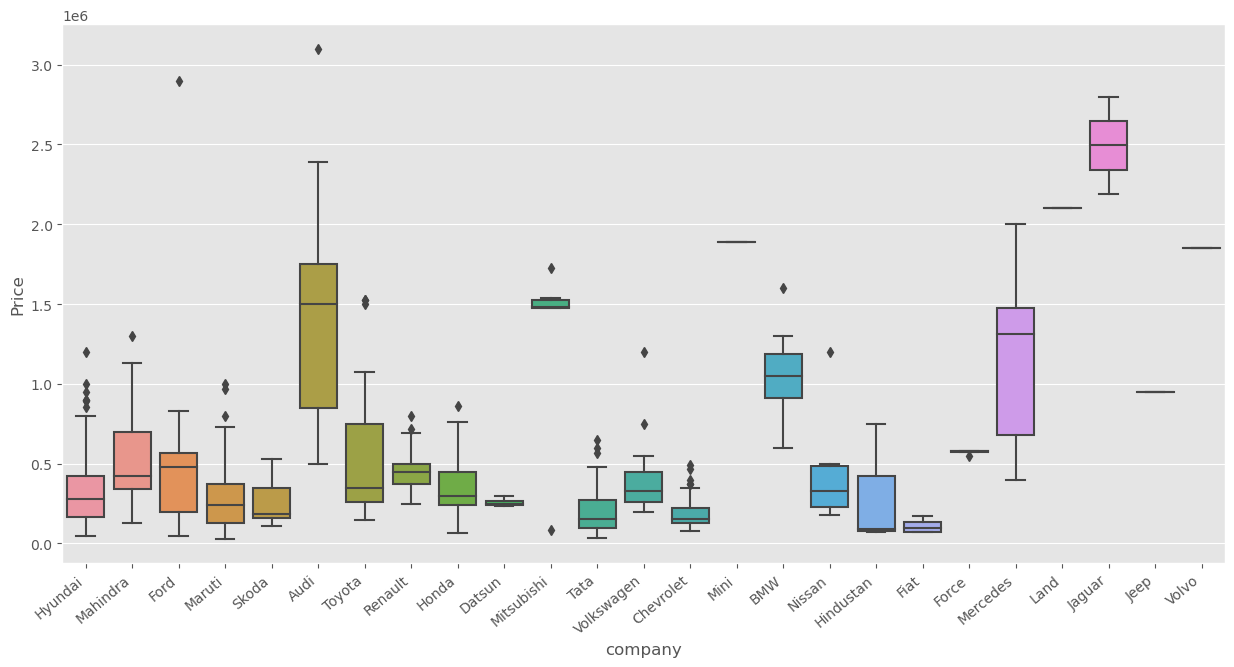

In [215]:
plt.subplots(figsize=(15,7))
axi=sns.boxplot(x='company',y='Price',data=car)
axi.set_xticklabels(axi.get_xticklabels(),rotation=40, ha='right')
plt.show()

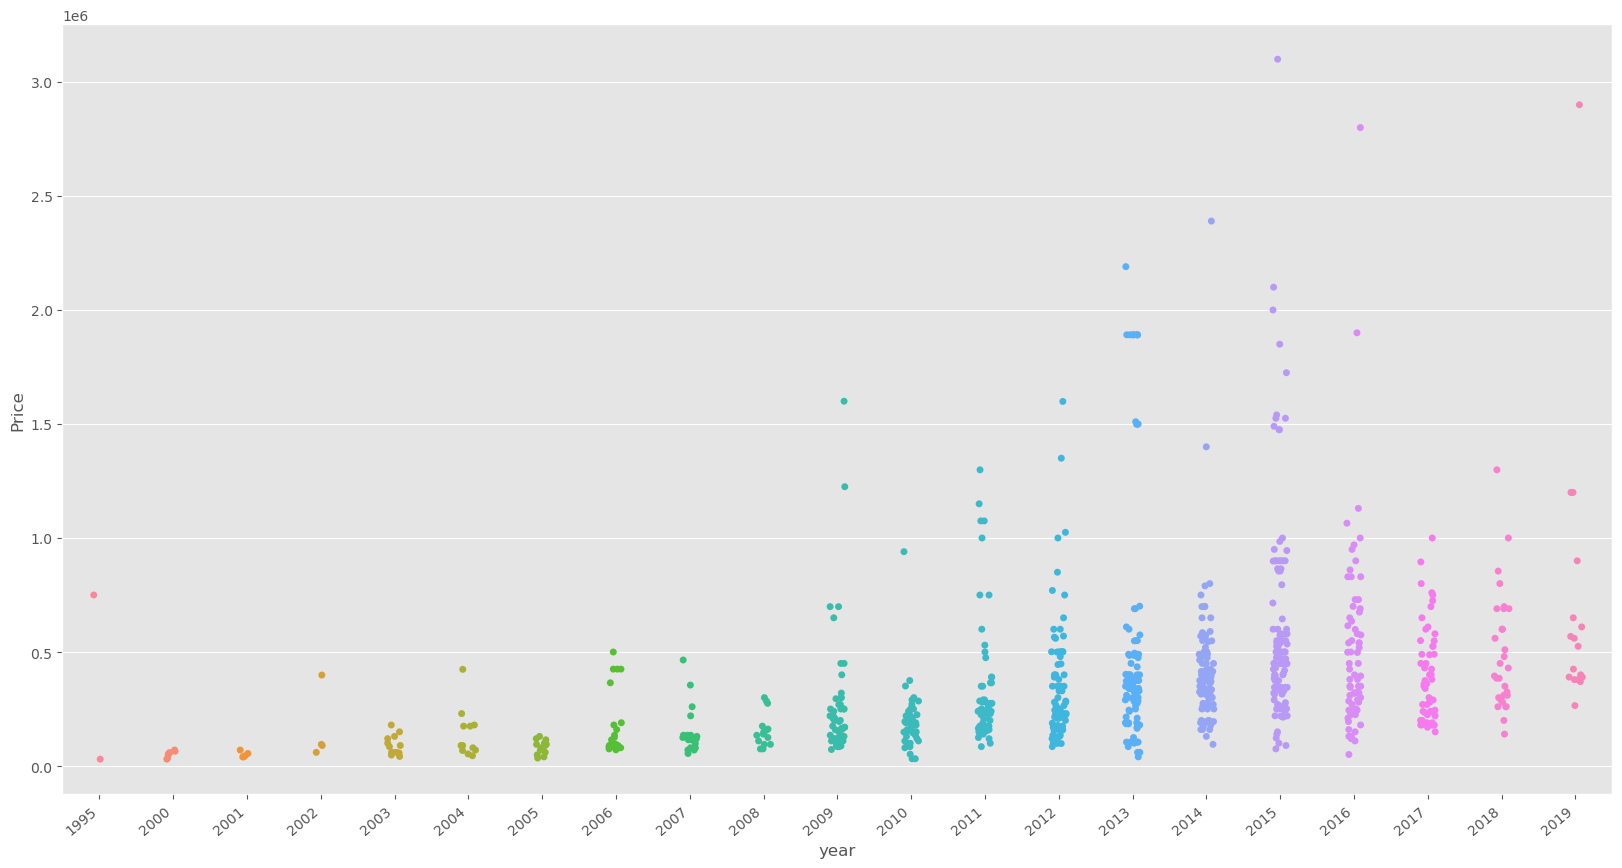

In [217]:
#checking relationship of Year with price 
plt.subplots(figsize=(20,10))
ax=sns.stripplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

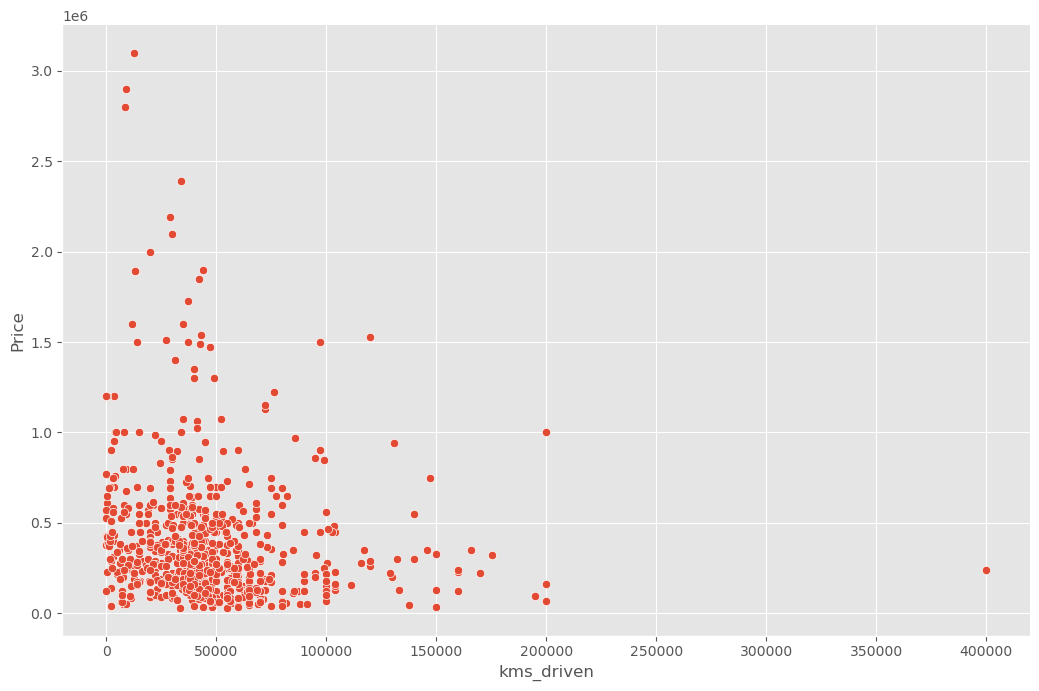

In [219]:
#checking relationship of Kms_driven with price
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

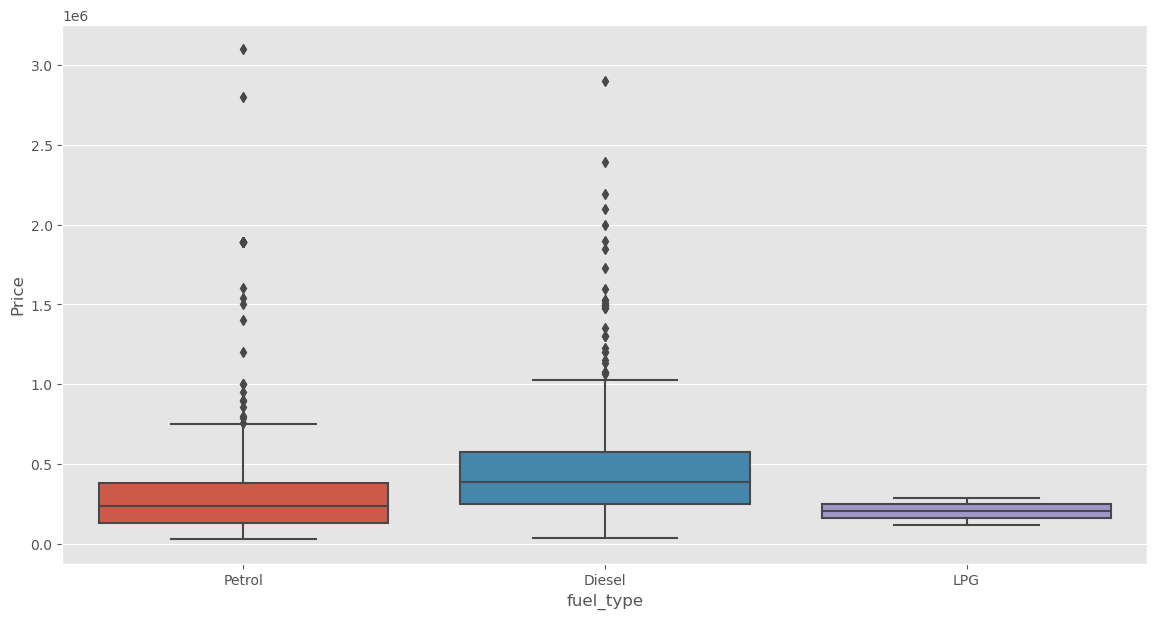

In [220]:
#checking Relationship pf FuelType with Price 
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

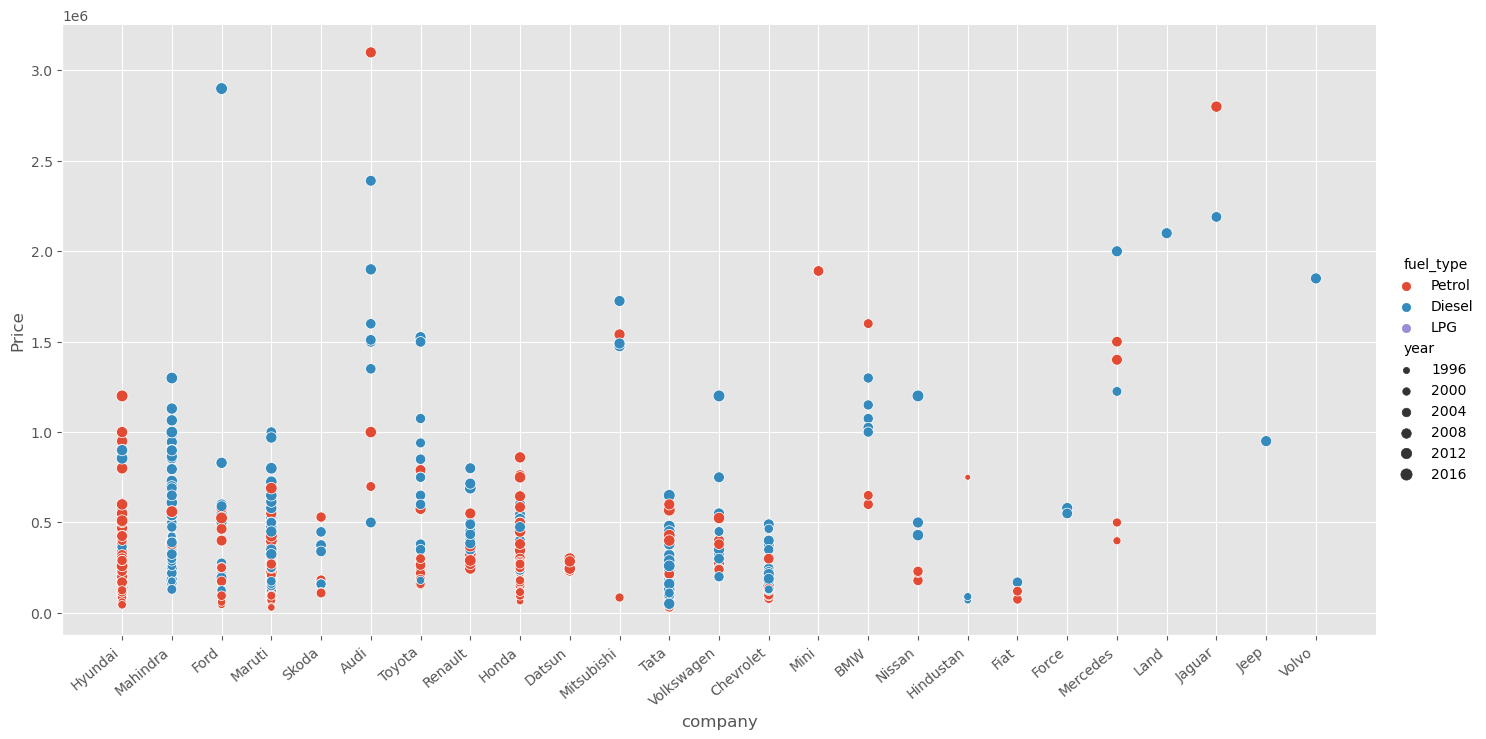

In [223]:
#Relationship of Price with FuelType, Year and Company mixed
axi=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
axi.set_xticklabels(rotation=40,ha='right')

In [224]:
x=car.drop(columns='Price')#Everything is features expcet the price 
y=car['Price']#target column

In [225]:
x

,company,name,year,kms_driven,fuel_type
0,Hyundai,Hyundai Santro Xing,2007,45000,Petrol
1,Mahindra,Mahindra Jeep CL550,2006,40,Diesel
2,Hyundai,Hyundai Grand i10,2014,28000,Petrol
3,Ford,Ford EcoSport Titanium,2014,36000,Diesel
4,Ford,Ford Figo,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti,Maruti Suzuki Ritz,2011,50000,Petrol
811,Tata,Tata Indica V2,2009,30000,Diesel
812,Toyota,Toyota Corolla Altis,2009,132000,Petrol
813,Tata,Tata Zest XM,2018,27000,Diesel


In [226]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int32

In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [229]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])
#Coulmns are adding in OneHotEncoder

OneHotEncoder()

In [230]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')
#remaning columns are passthrough
#SimpleImpute remove Nan Values..But in this present data we dont have any Nan Values.

In [231]:
lr=LinearRegression()

In [232]:
pipe=make_pipeline(column_trans,lr) #Here all the given Columns we are giving to Linear Regression.

In [233]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [234]:
y_predict=pipe.predict(x_test)
y_predict

array([ 3.18741658e+05,  8.62114194e+04,  4.96134404e+05,  2.75320197e+05,
        2.96519291e+05,  2.64783160e+05,  1.07999803e+06,  3.60068200e+05,
        1.77434992e+05,  3.21540191e+05,  3.67659501e+05,  5.27972070e+05,
        1.91881299e+05,  5.28044534e+05,  2.50959738e+05,  2.23770864e+05,
        5.50846593e+05,  5.95645518e+05,  4.49266060e+05,  4.57338216e+05,
       -9.32568683e+04,  9.71425555e+04,  6.72829815e+05,  5.49558124e+05,
        4.47221293e+05,  9.98918826e+05,  2.28193697e+05,  2.23681000e+06,
        2.63960845e+04,  1.08005989e+06,  3.94268421e+05,  8.46421239e+04,
        1.90233527e+05,  6.53948741e+05,  1.09396465e+06,  9.47270728e+04,
        3.32798229e+05,  3.00377523e+05,  3.31384494e+05,  6.12700323e+04,
        5.94757890e+05,  1.14741635e+06,  1.09933117e+06,  4.58392710e+05,
        1.04873370e+05,  6.66209405e+05,  5.28086268e+05,  2.22535048e+05,
        6.52588046e+05,  4.53923481e+05,  2.75648016e+05,  5.42137005e+05,
        1.10122522e+06,  

In [235]:
r2_score(y_test,y_predict)

0.7177991476221943

In [236]:
#import numpy as np
#np.argmax(score)
##score[np.argmax(score)]

In [237]:
#The Best Model is found at a certain random state 
#score=[]
#for i in range(1000)
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
#lr=LinearRegression()
#pipe=make_pipeline(column_trans,lr)
#pipe.fit(x_train,y_train)
#y_predict=pipe.predict(x_test)
#score.append(r2_score(y_test,y_predict))

In [238]:
import numpy as np
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(score))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_predict=pipe.predict(x_test)
r2_score(y_test,y_predict)

0.8457088635857648

In [242]:
import pickle

In [256]:
pickle.dump(pipe,open('lrm.pkl','wb'))

In [258]:
#how to predict
my_car_prediction=pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']], columns=['name','company','year','kms_driven','fuel_type']))

np.round(my_car_prediction[0],2)

458882.14